For gradual improvement, you need to get a KD higher than  1.458692342637206


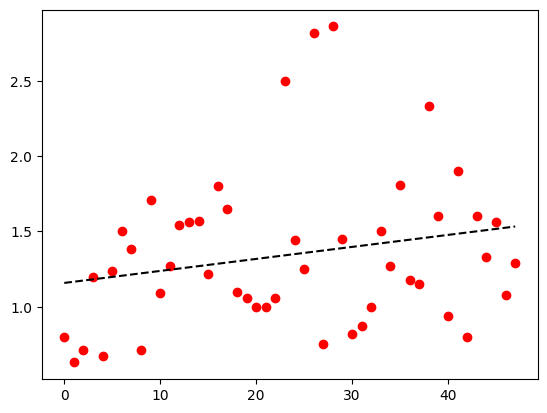

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.edge.service import Service
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

usernameinput = input(str("Enter Your IGN-"))
kde = []
kdf = []
uwe = 'Perfect'

s=Service("C:\Program Files (x86)\chromedriver.exe")     #used to remove DeprecationWarning
driver = webdriver.Chrome(service=s)

driver.get("https://www.valking.gg/")

search = driver.find_element("name", "username")
search.send_keys(usernameinput)
search.send_keys(Keys.RETURN)

time.sleep(1)

link = driver.find_element(By.CLASS_NAME, "showMoreText")
link.click()
time.sleep(2)
link = driver.find_element(By.CLASS_NAME, "showMoreText")
link.click()
time.sleep(2)
link = driver.find_element(By.CLASS_NAME, "showMoreText")
link.click()

try:
    main = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "main"))
    )
    
    outer = driver.find_elements(By.TAG_NAME, "div")
    for div in outer:
        BKDs = driver.find_elements(By.CLASS_NAME, "historyKDAAVGAmount")      
    for i in BKDs:
        kde.append(i.text)
    if uwe in kde:
        kde.remove('Perfect') #removing alphanumeric elements
                              
    for w in kde:
        kdf.append(float(w))
    yax = []
    nlm = len(kdf)
    for i in range(0, nlm):
        yax.append(i)         
    #print(yax)
    #print(kdf)
    
    yaxh = np.array(yax)
    w = yaxh.reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(w, kdf, train_size=.8, random_state=1) #80% data is for training
    
    regressor = LinearRegression()              #using linear regression for prediciton of KD with respect to the trend
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    Pred_KD= regressor.predict([[len(yax)+1]])           #predicting the KD for the next match
    print("For gradual improvement, you need to get a KD higher than ",Pred_KD[0])

    coef = np.polyfit(yax,kdf,1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(yax,kdf, 'ro', yax, poly1d_fn(yax), '--k')            #plotting graph to display insights

    
    
    
    
    
finally:
    driver.quit()